Prediction using Decision Tree Algorithm

**What is Decision Tree Algorithm?**

The decision tree Algorithm belongs to the family of supervised machine learning algorithms. It can be used for both a classification problem as well as for regression problem.
The goal of this algorithm is to create a model that predicts the value of a target variable, for which the decision tree uses the tree representation to solve the problem in which the leaf node corresponds to a class label and attributes are represented on the internal node of the tree.

Importing all the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import seaborn as sns

In [2]:
#importing dataset
df=pd.read_csv('D:/abcd/Iris.csv') #location of dataset on my machine
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
traits = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
# Create traits matrix
x = df.loc[:, traits].values

In [5]:
y=df.Species

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=0)

In [7]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [8]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [9]:
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [10]:
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [11]:
print(metrics.classification_report(y_test,clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



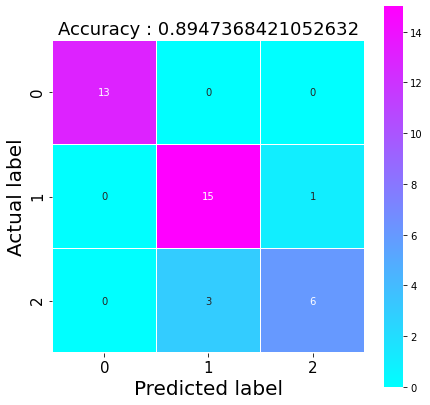

In [12]:
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'cool');
plt.ylabel('Actual label', fontsize = 20);
plt.xlabel('Predicted label', fontsize = 20);
plt.title('Accuracy : {}'.format(score), size = 18);
plt.tick_params(labelsize= 15)

In [13]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(x_train, y_train)

    score = clf.score(x_test, y_test)
    accuracy.append(score)

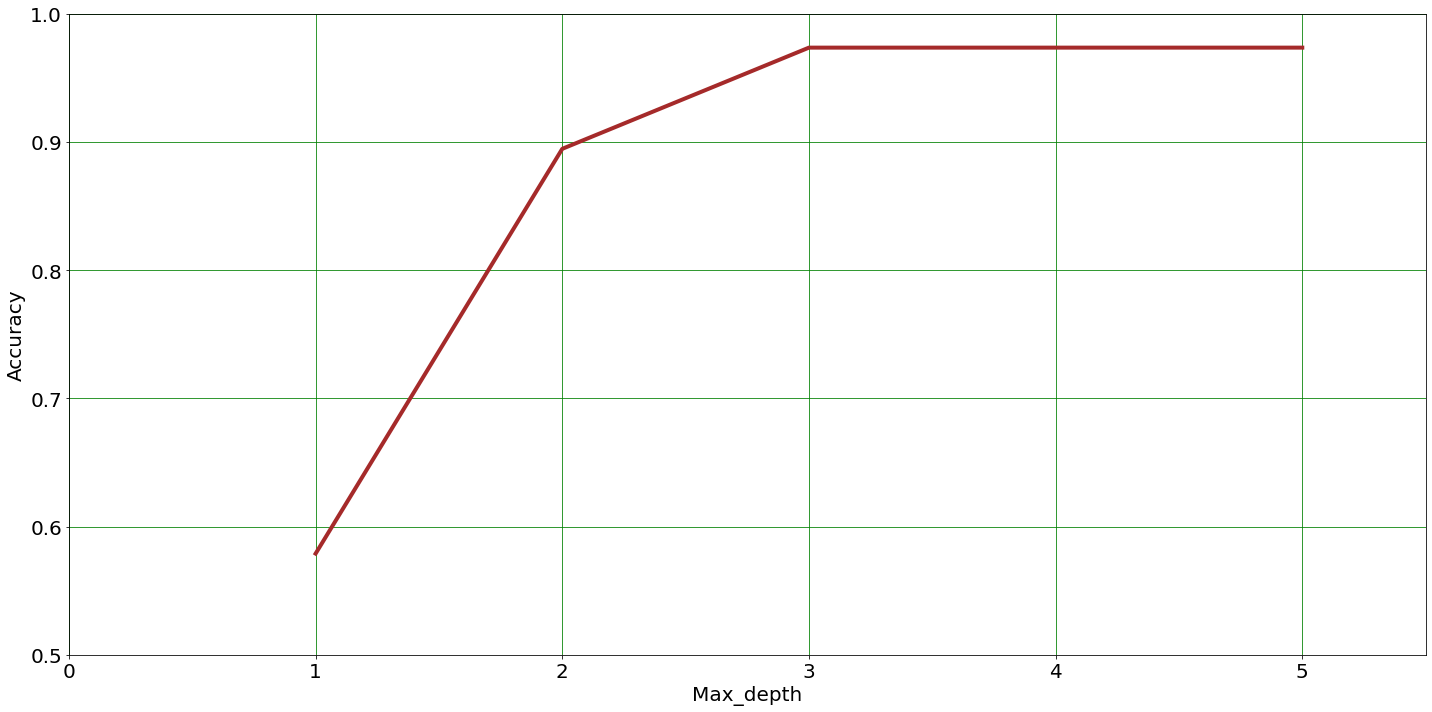

In [14]:
#ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,10));
ax.plot(max_depth_range,
        accuracy,
        lw=4,
        color='brown')

ax.set_xlim([0, 5.5])
ax.set_ylim([.50, 1.00])
ax.grid(True,
        axis = 'both',
        zorder = 0,
        linestyle = 'solid',
        color = 'green')


ax.tick_params(labelsize = 20)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xlabel('Max_depth', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
fig.tight_layout()

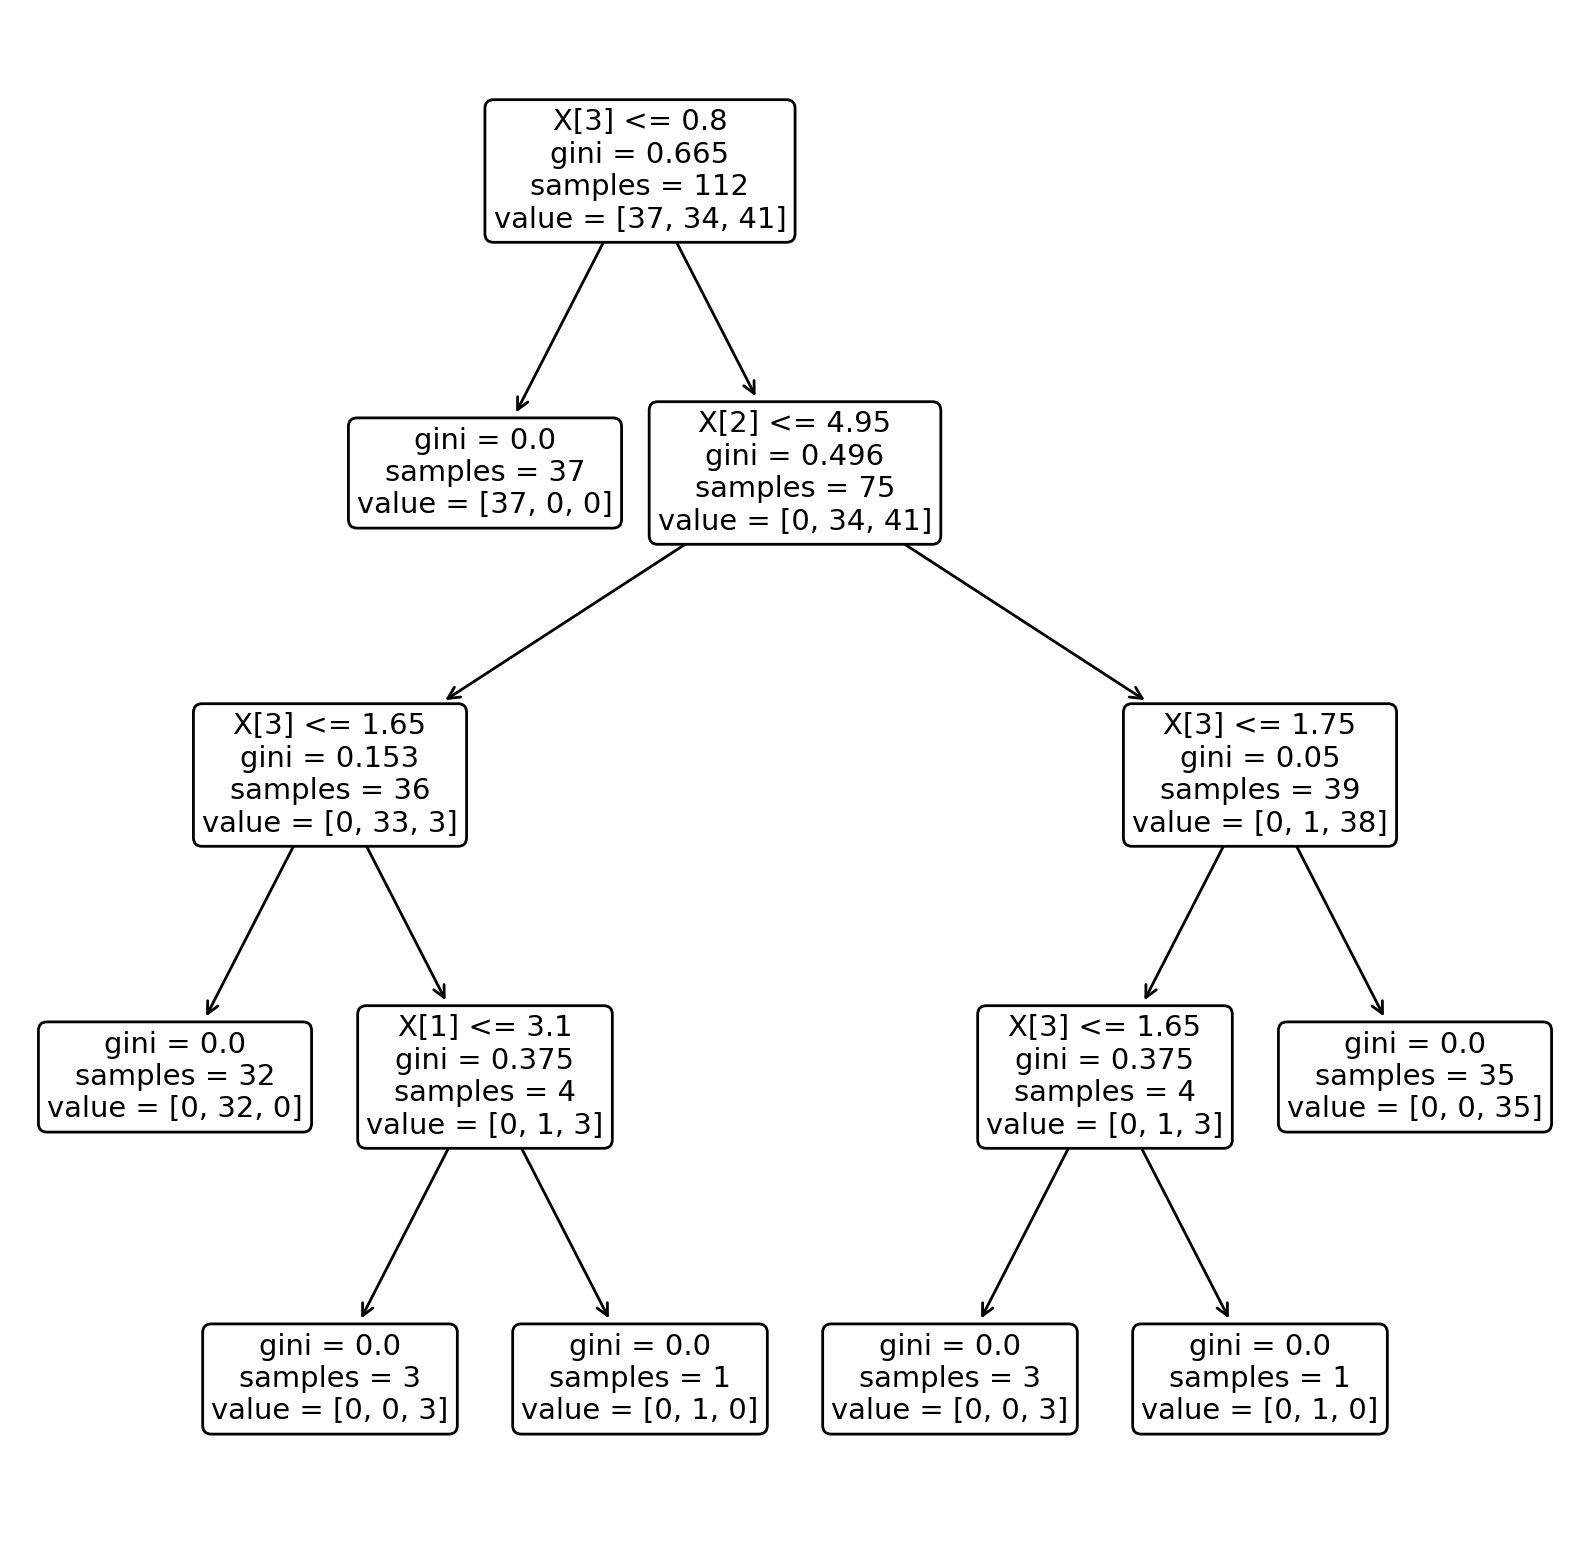

In [15]:
fig, axes = plt.subplots(figsize = (10,10), dpi = 200)
tree.plot_tree(clf,rounded=True);

In [16]:
# Putting the feature names and class names into variables
tn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

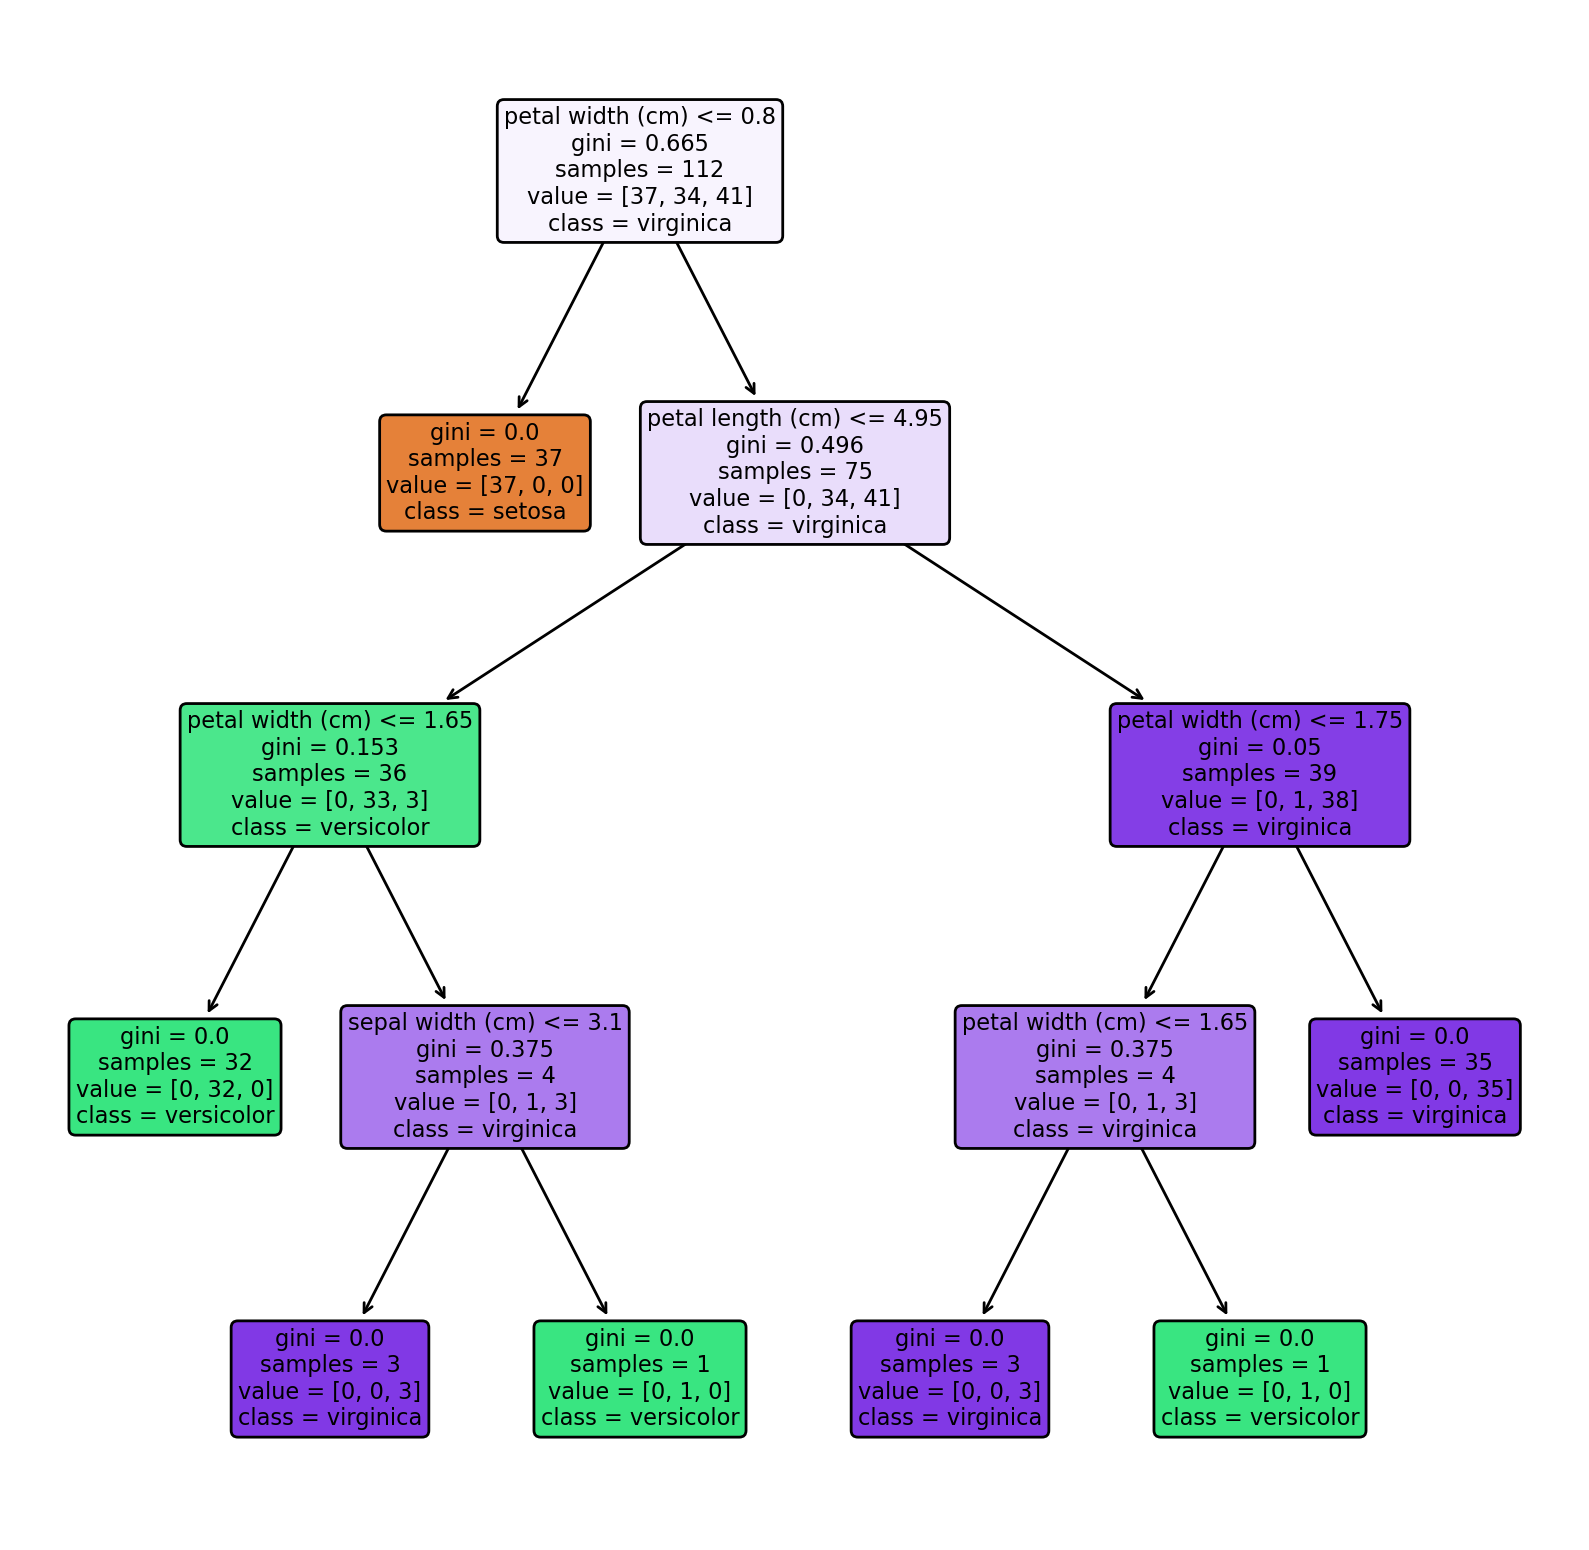

In [18]:
fig, axes = plt.subplots(figsize = (10,10), dpi = 200)
tree.plot_tree(clf,
               feature_names = tn, 
               class_names=cn,
               filled = True,
               rounded=True);

Conclusion:

1) Accuracy of our model is 89.47%.

2) Model performance can be seen in the confusion matrix and classification report.

3) Optimal model depth is 3